In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

<Axes: >

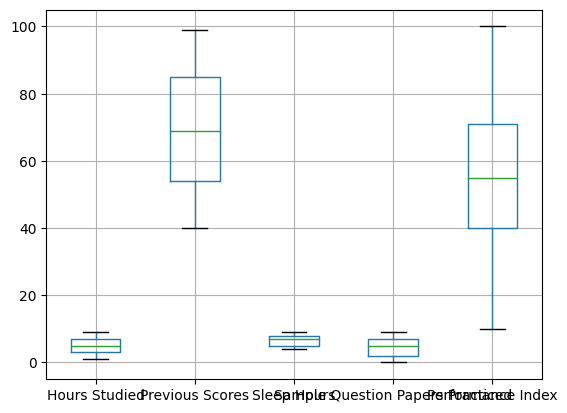

In [5]:
df.boxplot(grid=True) # we use this for checking outliers

In [6]:
    def missing_data(data):
        total=data.isnull().sum().sort_values(ascending=False)
        percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
        missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
        return missing_data

In [7]:
missing_data(df)

,total,percent
Hours Studied,0,0.0
Previous Scores,0,0.0
Extracurricular Activities,0,0.0
Sleep Hours,0,0.0
Sample Question Papers Practiced,0,0.0
Performance Index,0,0.0


In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


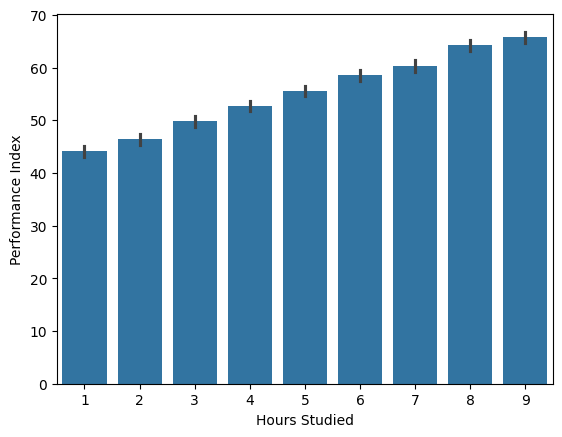

In [11]:
sns.barplot(data=df,x="Hours Studied",y="Performance Index")
plt.show()

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

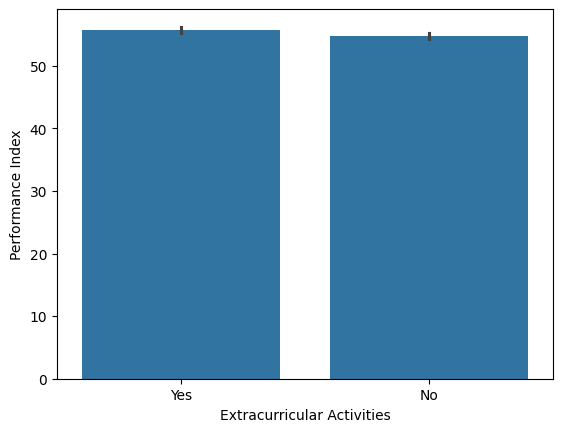

In [12]:
sns.barplot(data=df,x="Extracurricular Activities",y="Performance Index")

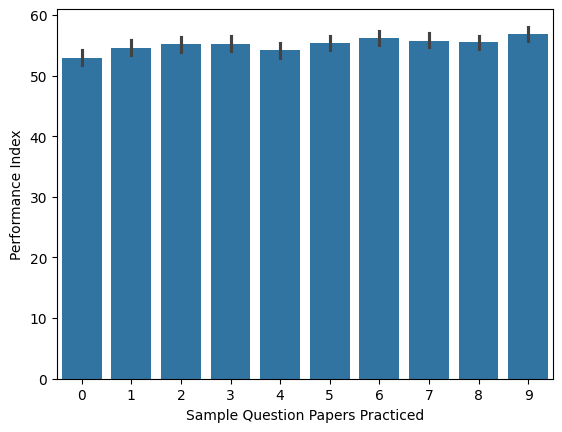

In [13]:
sns.barplot(data=df,x="Sample Question Papers Practiced",y="Performance Index")
plt.show()

<Axes: xlabel='Performance Index', ylabel='Extracurricular Activities'>

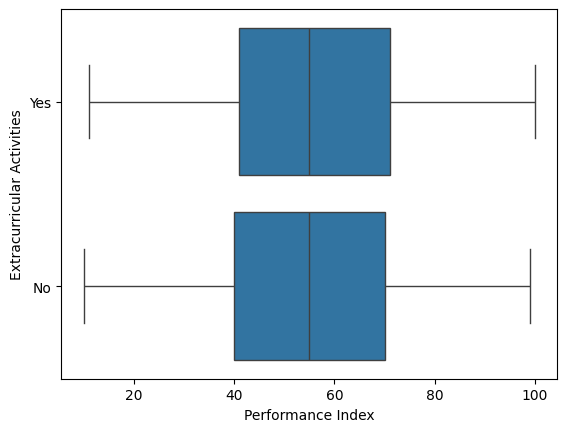

In [14]:
sns.boxplot(data=df,x="Performance Index",y="Extracurricular Activities")

In [15]:
# Check the current data type of the column
print(df['Extracurricular Activities'].dtype)

# If the column contains strings that represent numbers, convert them to numeric values
df['Extracurricular Activities'] = pd.to_numeric(df['Extracurricular Activities'], errors='coerce')  # coerce non-convertible entries to NaN

# If there are NaN values due to non-convertible entries, fill them or handle as needed
df['Extracurricular Activities'].fillna(0, inplace=True)  # Filling NaNs with 0 (or any other suitable value)

# Convert the column to integer type
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)

# Check the data type after conversion
print(df['Extracurricular Activities'].dtype)

object
int32


In [16]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y= df['Performance Index']

In [17]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,0,9,1
1,4,82,0,4,2
2,8,51,0,7,2
3,5,52,0,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,0,4,2
9996,7,64,0,8,5
9997,6,83,0,8,5
9998,9,97,0,7,0


In [18]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

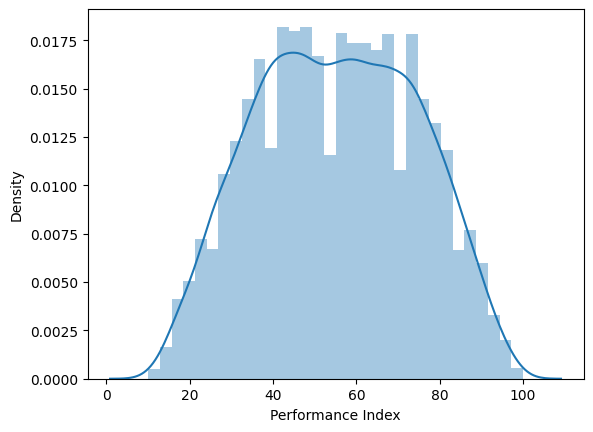

In [19]:
sns.distplot(y,hist=True,kde=True)
plt.show()

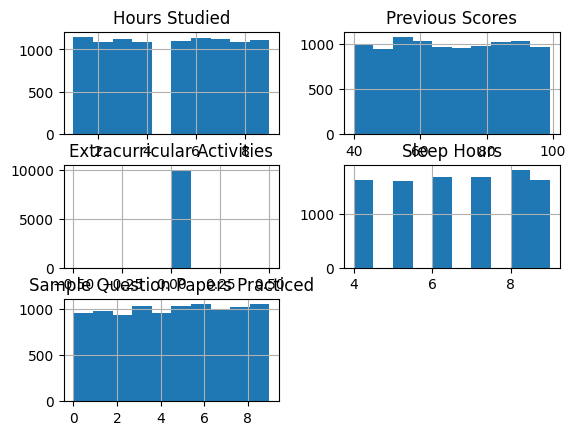

In [20]:
X.hist(bins=10)
plt.show()

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int32
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
dtypes: int32(1), int64(4)
memory usage: 351.7 KB


In [22]:
data_num_skew=X.apply(lambda x: skew(x.dropna()))
data_num_skewed=data_num_skew[(data_num_skew>0.75)|(data_num_skew<-0.75)]
print(data_num_skew)
print(data_num_skewed)

Hours Studied                      -0.004212
Previous Scores                     0.004501
Extracurricular Activities               NaN
Sleep Hours                        -0.039468
Sample Question Papers Practiced   -0.035631
dtype: float64
Series([], dtype: float64)


In [23]:
X.drop("Extracurricular Activities",axis=1,inplace=True)

In [24]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df=pd.DataFrame()
vif_df["features"]=X.columns
vif_df["VIF Factor"]=[vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Hours Studied,4.25
1,Previous Scores,9.87
2,Sleep Hours,9.74
3,Sample Question Papers Practiced,3.34


In [26]:
from sklearn.model_selection import train_test_split
# >1000 --> test size =0.3
# <1000 --> test size =0.3

# split the data inot test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [27]:
##Rerun the VIF CODE

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train_scale
X_test_scale

array([[-1.55047447, -0.149153  ,  0.87091473, -1.60299604],
       [-0.00212898, -1.65122642, -0.30460709,  0.84659677],
       [-1.1633881 , -0.61132944, -1.48012891, -1.60299604],
       ...,
       [-0.77630172, -0.20692506, -0.30460709,  0.84659677],
       [-0.38921535,  0.83297193,  0.87091473,  0.49665494],
       [ 0.77204377, -0.03360889, -0.892368  , -0.55317055]])

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 4)
(8000,)
(2000, 4)
(2000,)


In [29]:
from sklearn.linear_model import LinearRegression
# create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train_scale,y_train)

LinearRegression()

In [30]:
#print intercepts and coefficients
print(lm.intercept_)
print(lm.coef_)

55.406625
[ 7.37279839 17.62877657  0.81432055  0.55517346]


In [31]:
# pair the feature name with coefficients
print(list(zip(X,lm.coef_)))

[('Hours Studied', 7.372798388764123), ('Previous Scores', 17.628776570685908), ('Sleep Hours', 0.8143205543485843), ('Sample Question Papers Practiced', 0.5551734649992124)]


In [32]:
Y_pred=lm.predict(X_test_scale)
print(Y_pred)

[41.16516729 26.50378709 33.95696878 ... 46.25723358 68.20622809
 59.4724852 ]


In [33]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual performance index"]=y_test
new_df["Predicted performance index"]=Y_pred
new_df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Actual performance index,Predicted performance index
937,1,67,8,0,38.0,41.165167
9355,5,41,6,7,27.0,26.503787
2293,2,59,4,0,30.0,33.956969
192,7,58,4,7,49.0,48.568016
8675,3,58,8,8,39.0,39.261158
...,...,...,...,...,...,...
5624,3,97,7,1,78.0,77.142159
6005,7,53,5,3,40.0,43.177275
987,3,66,6,7,48.0,46.257234
6152,4,84,8,6,64.0,68.206228


In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred)
print("R Square: ",r2)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred))
print("RMSE: ",rmse)

R Square:  0.9883596470527938
Adjusted R Square:  0.9883549885823797
RMSE:  2.0847218961584795


In [37]:
new_df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Actual performance index,Predicted performance index
937,1,67,8,0,38.0,41.165167
9355,5,41,6,7,27.0,26.503787
2293,2,59,4,0,30.0,33.956969
192,7,58,4,7,49.0,48.568016
8675,3,58,8,8,39.0,39.261158
53,6,62,9,0,52.0,50.821089
9596,1,44,8,7,21.0,19.100751
265,5,68,4,8,52.0,53.238981
984,8,61,6,0,53.0,54.074580
9793,4,57,9,9,40.0,41.769522


In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)